## Quantative Predictors And Interaction Terms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "./data/"
credit = pd.read_csv(data_path+"Credit.csv", index_col=0)

#### 범주가 2개인 범주형 변수

In [2]:
model = smf.ols('Balance ~ Student', data = credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.49e-07
Time:                        19:25:49   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# design matrix 생성
import patsy
y, X = patsy.dmatrices('Balance ~ Student', data = credit, return_type='dataframe')
X.head()

,Intercept,Student[T.Yes]
1,1.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0


#### 범주가 3개 이상인 범주형 변수

In [4]:
model2 = smf.ols('Balance ~ Ethnicity ', data = credit).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


#### 기준 레벨(referecne level) 변경

In [5]:
model3 = smf.ols('Balance ~ C(Ethnicity, Treatment(reference = "Asian")) ', data = credit).fit()
model3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,512.3137,45.632,11.227,0.000,422.602,602.025
"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]",18.6863,65.021,0.287,0.774,-109.142,146.515
"C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]",6.1838,56.122,0.110,0.912,-104.149,116.517


In [6]:
# Design Matrix 생성
y, X1 = patsy.dmatrices('Balance ~ Ethnicity', data = credit, return_type = "dataframe")
y, X2 = patsy.dmatrices('Balance ~ C(Ethnicity, Treatment(reference = "Asian")) ', data = credit, return_type="dataframe")

In [7]:
X1.head()

,Intercept,Ethnicity[T.Asian],Ethnicity[T.Caucasian]
1,1.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
5,1.0,0.0,1.0


In [8]:
X2.head()

,Intercept,"C(Ethnicity, Treatment(reference=""Asian""))[T.African American]","C(Ethnicity, Treatment(reference=""Asian""))[T.Caucasian]"
1,1.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,1.0


#### 범주형 설명변수와 연속형 설명변수

In [9]:
model4 = smf.ols('Balance ~ Income + Student ', data = credit).fit()
model4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,211.1430,32.457,6.505,0.000,147.333,274.952
Student[T.Yes],382.6705,65.311,5.859,0.000,254.272,511.069
Income,5.9843,0.557,10.751,0.000,4.890,7.079


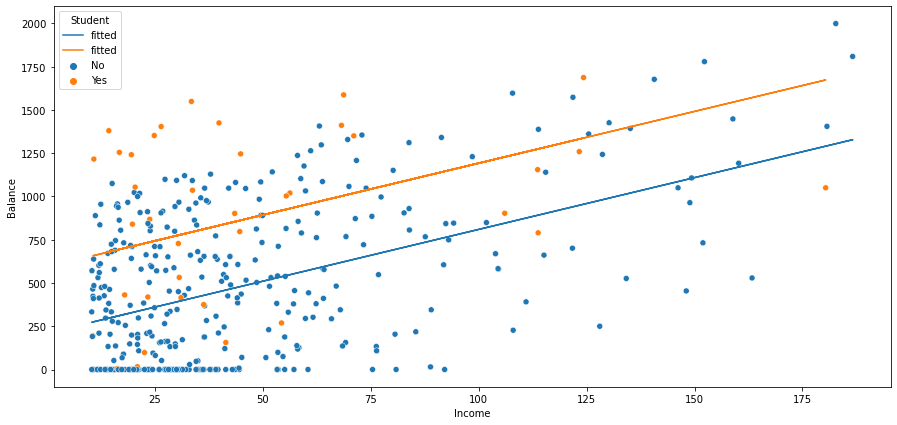

In [10]:
credit['fitted'] = model4.fittedvalues

import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))

credit.groupby('Student').plot(x='Income', y='fitted', 
                               ax=ax, legend=False)
sns.scatterplot(x= "Income", y="Balance", data=credit, hue="Student")
plt.show()

In [11]:
# 부분 F 검정
from statsmodels.stats.anova import anova_lm
model5 = smf.ols('Balance ~ Income + Student + Ethnicity ', data = credit).fit()
model5.summary().tables[1]

# Model 4 : Reduced Model, RSS0
# Model 5 : Full Model, RSS
anova_lm(model4, model5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,6.093905e+07,0.0,NaN,NaN,NaN
1,395.0,6.090901e+07,2.0,30047.507138,0.09743,0.907187


#### Effect coding

In [12]:
model5 = smf.ols('Balance ~ Income + C(Student, Sum)', data = credit).fit()
model5.summary().tables[1]

y, X = patsy.dmatrices('Balance ~ Income + C(Student, Sum)', data=credit, return_type = "dataframe")
X.head()

,Intercept,"C(Student, Sum)[S.No]",Income
1,1.0,1.0,14.891
2,1.0,-1.0,106.025
3,1.0,1.0,104.593
4,1.0,1.0,148.924
5,1.0,1.0,55.882


#### 교호작용 효과

In [13]:
ad=pd.read_csv(data_path + "Advertising.csv")
model_ad = smf.ols('Sales~TV+Radio+TV*Radio', data = ad).fit()
model_ad.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


#### 범주형 변수와 연속형 변수 사이의 교호작용

In [14]:
model6 = smf.ols('Balance~(Income+Student)**2', data = credit).fit()
model6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.6232,33.698,5.953,0.000,134.373,266.873
Student[T.Yes],476.6758,104.351,4.568,0.000,271.524,681.827
Income,6.2182,0.592,10.502,0.000,5.054,7.382
Income:Student[T.Yes],-1.9992,1.731,-1.155,0.249,-5.403,1.404


#### 범주형 변수 처리 실습

1. Allen Cognitive Level (ACL) Study를 진행하는 연구자들은 ACL test 점수와 정신병리학적 수준과의 관계를 알아보기 위해 아래의 변수들을 측정하였다.

Response y = ACL test score  
Predictor x1 = vocabulary (Vocab) score on the Shipley Institute of Living Scale  
Predictor x2 = abstraction (Abstract) score on the Shipley Institute of Living Scale  
Predictor x3 = score on the Symbol-Digit Modalities Test (SDMT)

1-a. 23명의 환자들에 대한 데이터인 `allentestn23.txt`를 사용하여 Scatterplot matrix를 그리고 회귀모형을 적합하기에 적당한지 확인하시오. 어떤 문제가 발생할 것으로 예상되는가?

In [15]:
test23 = pd.read_table(data_path+'allentestn23.txt', sep="\t", index_col=0)
test23.head()

,ACL,SDMT,Vocab,Abstract
Subj,,,,
6,4.5,23,24,24
8,5.9,50,18,14
10,4.8,27,14,8
15,4.5,26,15,10
17,5.9,42,30,32


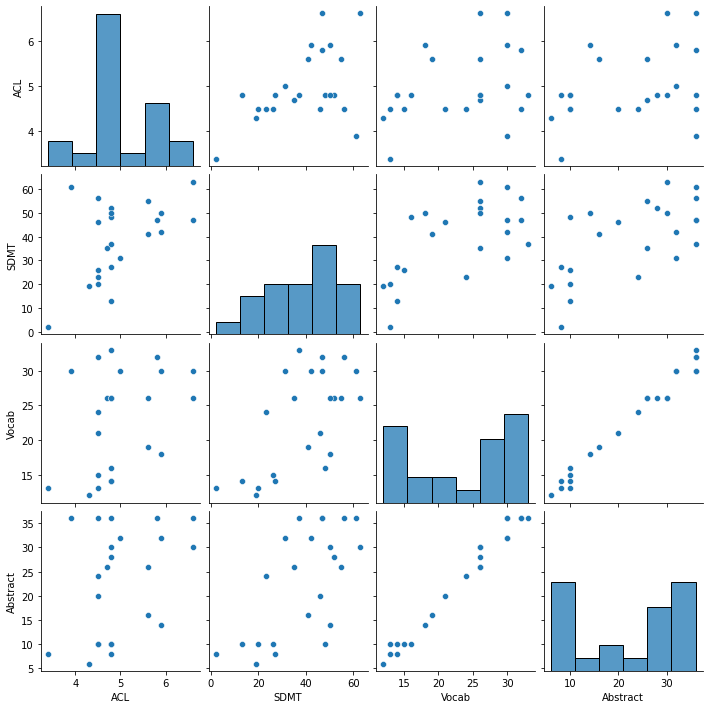

In [16]:
sns.pairplot(test23)
plt.show()

1-b. `allentestn23.txt`데이터로 회귀모형을 적합하고 다중공선성의 문제가 발생하는지 파악하시오. 어느 변수들 간의 문제가 발생하는가?

In [17]:
model = smf.ols('ACL~SDMT+Vocab+Abstract',data=test23).fit()

import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test23, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 76.84316917575055
VIF of SDMT : 1.7261852740005994
VIF of Vocab : 49.286238682129245
VIF of Abstract : 50.60308486118107


1-3. 본 연구에서는 위에서 문제가 된 두 변수를 모형에 포함시켜야 하는 과학적 이유가 존재하여 데이터를 더 모으기로 결정하였다. `allentest.txt` 데이터를 사용하여 위의 과정을 반복하고 다중공선성 문제가 해소되었는지 확인하시오.

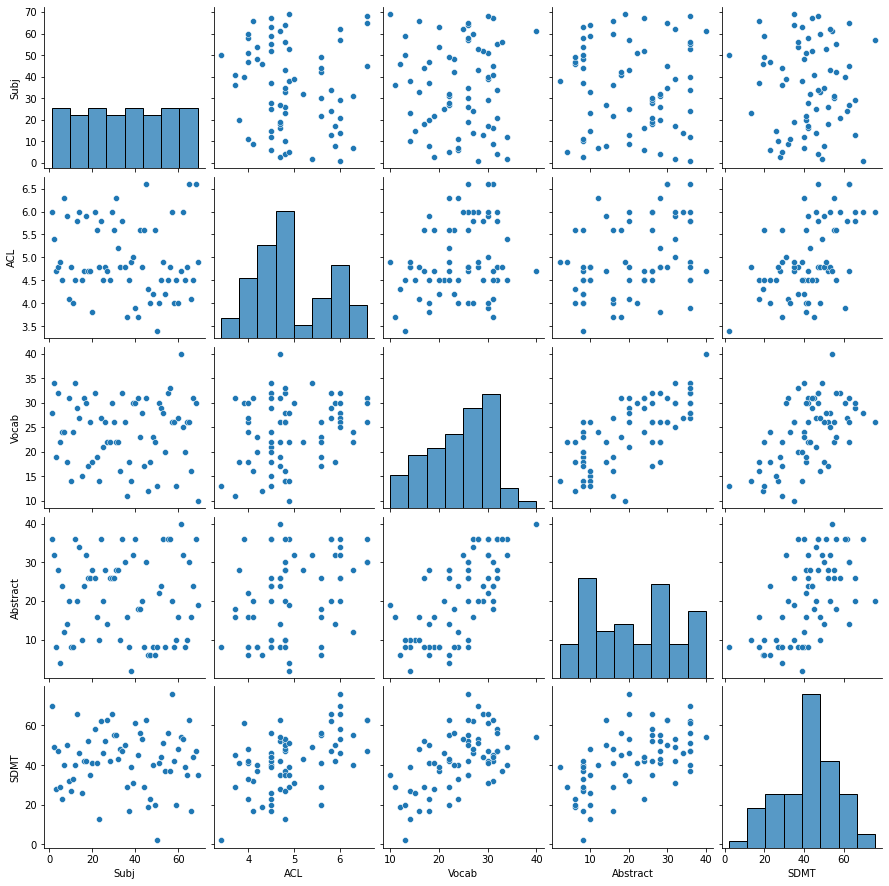

In [18]:
test = pd.read_table(data_path + 'allentest.txt', sep="\t")
sns.pairplot(test)
plt.show()

In [19]:
model = smf.ols('ACL~SDMT+Vocab+Abstract',data=test).fit()

import patsy
y, X = patsy.dmatrices('ACL~SDMT+Vocab+Abstract', test, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 16.670443334584185
VIF of SDMT : 1.6096624348013036
VIF of Vocab : 2.0932972330713193
VIF of Abstract : 2.1674284112401403


## Variable Selection And Shrinkage Method

#### 변수 선택

In [32]:
import patsy
y, X = patsy.dmatrices('Balance~'+"+".join(credit.columns[:-2]), data = credit, return_type='dataframe')
X.head()

,Intercept,Gender[T.Female],Student[T.Yes],Married[T.Yes],Ethnicity[T.Asian],Ethnicity[T.Caucasian],Income,Limit,Rating,Cards,Age,Education
1,1.0,0.0,0.0,1.0,0.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0
2,1.0,1.0,1.0,1.0,1.0,0.0,106.025,6645.0,483.0,3.0,82.0,15.0
3,1.0,0.0,0.0,0.0,1.0,0.0,104.593,7075.0,514.0,4.0,71.0,11.0
4,1.0,1.0,0.0,0.0,1.0,0.0,148.924,9504.0,681.0,3.0,36.0,11.0
5,1.0,0.0,0.0,1.0,0.0,1.0,55.882,4897.0,357.0,2.0,68.0,16.0


In [33]:
y.head()

,Balance
1,333.0
2,903.0
3,580.0
4,964.0
5,331.0


In [34]:
# Best subset selection을 위한 코드 
# Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
# Modified by Yeojin Chung

import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic, 
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
           "r2":regr.rsquared }

def getBest(k, best = "AIC"):
    
    tic = time.time()   
    results = []
    
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else: 
        best_model = models.loc[models[best].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [35]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]-1):
    models_best.loc[i] = getBest(i, best = "AIC")

models_best

Processed 11 models on 1 predictors in 0.01099705696105957 seconds.
Processed 55 models on 2 predictors in 0.05300164222717285 seconds.
Processed 165 models on 3 predictors in 0.1719982624053955 seconds.
Processed 330 models on 4 predictors in 0.3260021209716797 seconds.
Processed 462 models on 5 predictors in 0.4530017375946045 seconds.
Processed 462 models on 6 predictors in 0.5219995975494385 seconds.
Processed 330 models on 7 predictors in 0.3640878200531006 seconds.
Processed 165 models on 8 predictors in 0.17699980735778809 seconds.
Processed 55 models on 9 predictors in 0.06099820137023926 seconds.
Processed 11 models on 10 predictors in 0.012002229690551758 seconds.


,model,RSS,AIC,BIC,adj_r2,r2
1,<statsmodels.regression.linear_model.Regressio...,2.143512e+07,5494.781548,5502.764477,0.745210,0.745848
2,<statsmodels.regression.linear_model.Regressio...,1.053254e+07,5212.557085,5224.531479,0.874489,0.875118
3,<statsmodels.regression.linear_model.Regressio...,4.227219e+06,4849.386992,4865.352851,0.949499,0.949879
4,<statsmodels.regression.linear_model.Regressio...,3.915058e+06,4820.701337,4840.658660,0.953110,0.953580
5,<statsmodels.regression.linear_model.Regressio...,3.866091e+06,4817.666820,4841.615607,0.953579,0.954161
6,<statsmodels.regression.linear_model.Regressio...,3.821620e+06,4815.038963,4842.979215,0.953996,0.954688
7,<statsmodels.regression.linear_model.Regressio...,3.810759e+06,4815.900560,4847.832276,0.954010,0.954817
8,<statsmodels.regression.linear_model.Regressio...,3.804746e+06,4817.268900,4853.192081,0.953965,0.954888
9,<statsmodels.regression.linear_model.Regressio...,3.798367e+06,4818.597738,4858.512384,0.953924,0.954964
10,<statsmodels.regression.linear_model.Regressio...,3.791345e+06,4819.857603,4863.763713,0.953891,0.955047


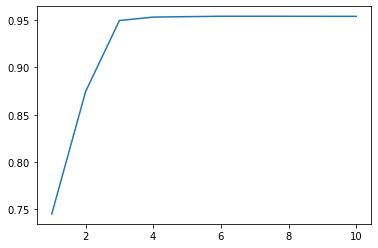

In [36]:
plt.plot(models_best['adj_r2'])
plt.show()

In [37]:
model_final = models_best.iloc[models_best['adj_r2'].argmax(),0]
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          3.50e-259
Time:                        19:28:54   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -488.6159     25.289    -19.321      0.000    -538.335    -438.897
Gender[T.Female]   -10.4532      9.890     -1.057      0.291     -29.896       8.990
Student[T.Yes]     426.5813     16.533     25.802      0.000     394.077     459.085
Income              -7.8036      0.234    -33.417      0.000      -8.263      -7.345
Limit                0.1936      0.032      5.980      0.000       0.130       0.257
Rating               1.0940      0.485      2.257      0.025       0.141       2.047
Cards               18.1092      4.319      4.193      0.000       9.618      26.601
Age                 -0.6207      0.292     -2.127      0.034      -1.194      -0.047
==============================================================================
Omnibus:                       34.049   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.600
Skew:                           0.773   Prob(JB):                     1.53e-09
Kurtosis:                       3.211   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀 모형 수축

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X)

ridge_reg.coef_

array([[ 0.00000000e+00, -1.01531108e+01,  4.13899860e+02,
        -9.12155389e+00,  1.67728726e+01,  9.66826039e+00,
        -7.79613765e+00,  1.88633083e-01,  1.16935286e+00,
         1.74952276e+01, -6.22845855e-01, -1.00749787e+00]])

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X, y)

y_pred = lasso_reg.predict(X)

lasso_reg.coef_

c:\Users\lucky\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+06, tolerance: 8.434e+03
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00, -1.06082218e+01,  4.25689009e+02, -8.45041224e+00,
        1.66497454e+01,  9.99657462e+00, -7.80320873e+00,  1.91959216e-01,
        1.12083024e+00,  1.77952880e+01, -6.13858939e-01, -1.10161563e+00])

#### 변수 선택 및 회귀 모형 수축 실습문제

[1-3] `Infection.csv`는 병원에서의 감염위험에 대한 데이터이다. 아래의 변수들을 사용하여 회귀분석을 시행하고자 한다.
  
Y = InfctRsk: infection risk in hospital  
X1 = Stay: average length of patient’s stay (in days)  
X2 = Xray: a measure of frequency of giving X-rays  
X3 = Region: indication in which of 4 U.S. regions the hospital is located: north-east(1), north-central(2), south(3), west(4).

In [40]:
data = pd.read_csv(data_path + "infection.csv", index_col=0)

1. 고려하고 있는 네 개의 변수 간의 산점도행렬을 확인하여라. 이상치가 발견되는가? Stay 변수를 기준으로 가장 큰 두 관측치를 제외하고 아래의 분석을 진행하기로 한다.

In [41]:
data.head()

,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


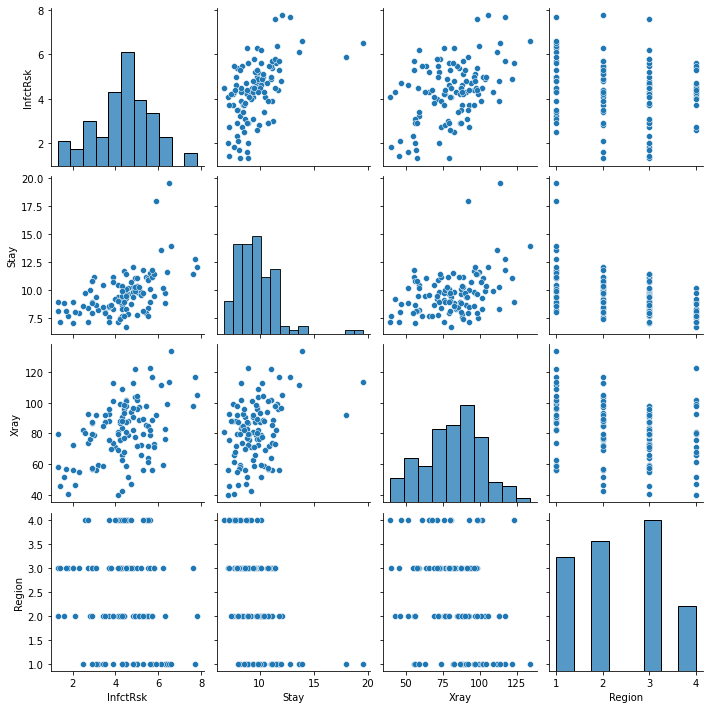

In [42]:
# Region은 범주형 변수이기 때문에 사실은 Scatter plot에 적합하지 않음
sns.pairplot(data, vars=['InfctRsk','Stay','Xray','Region'])
plt.show()

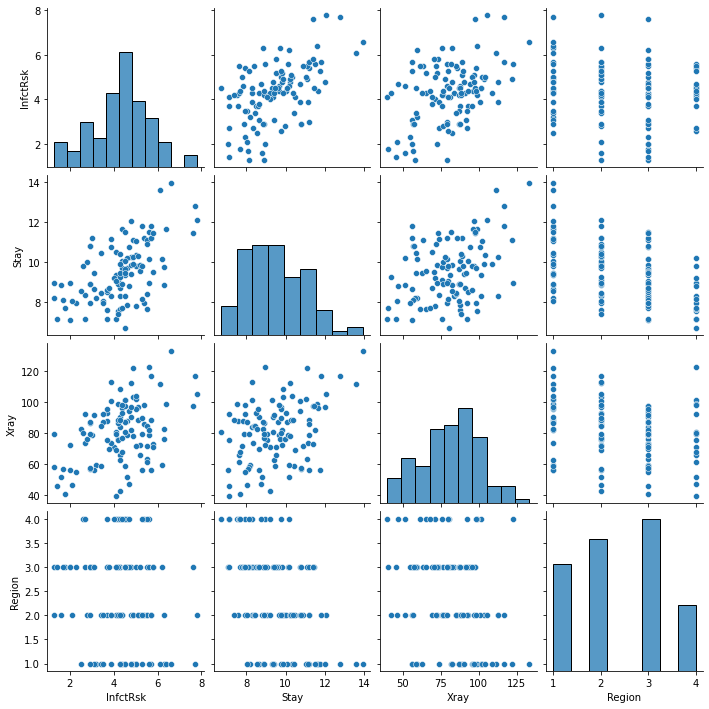

In [43]:
data2 = data.loc[data.Stay<15,:].copy()
sns.pairplot(data2, vars=['InfctRsk','Stay','Xray','Region'])
plt.show()

2. Infection risk를 나머지 세 변수로 셜명하는 모형을 적합하여라. 각 회귀계수의 유의성을 테스트 하고 유의한 계수의 의미를 해석하시오.

In [44]:
data2['Region_c'] = data2['Region'].astype('category')
model = smf.ols('InfctRsk~Stay+Xray+Region',data2).fit()
model.summary()
# Region의 해석을 어떻게 할 것인가? Region은 순서를 갖지도 않은 범주형이므로, 1 증가할 때 0.2405만큼 지역이 변한다는 해석은 X

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     22.64
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.99e-11
Time:                        19:31:36   Log-Likelihood:                -161.29
No. Observations:                 111   AIC:                             330.6
Df Residuals:                     107   BIC:                             341.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4089      0.960     -2.510      0.014      -4.311      -0.507
Stay           0.4790      0.082      5.839      0.000       0.316       0.642
Xray           0.0199      0.006      3.505      0.001       0.009       0.031
Region         0.2405      0.117      2.064      0.041       0.010       0.471
==============================================================================
Omnibus:                        0.250   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.368
Skew:                          -0.103   Prob(JB):                        0.832
Kurtosis:                       2.807   Cond. No.                         811.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# 범주형 변수에 대한 인식 완료
model = smf.ols('InfctRsk~Stay+Xray+Region_c',data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.24e-11
Time:                        19:31:44   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.1343      0.877     -2.433      0.017      -3.874      -0.395
Region_c[T.2]     0.1713      0.281      0.609      0.544      -0.387       0.729
Region_c[T.3]     0.0955      0.289      0.330      0.742      -0.477       0.668
Region_c[T.4]     1.0578      0.378      2.798      0.006       0.308       1.807
Stay              0.5054      0.081      6.205      0.000       0.344       0.667
Xray              0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# 범주형 변수에 대한 이름 변경
data2['Region_c'] = data2.Region_c.cat.rename_categories(['north-east','north-central','south','west'])

In [47]:
# 현재 reference level이 north-east (현재 보이지 않는 범주형 변수)
# 계수해석; west만 유의하다; Stay와 Xray가 일정한 수준일 때 (동일할 때), north-east에 비해 west 지역의 병원의 InfctRisk가 1.0578만큼 크며, 통계적으로 의미가 있다
#          그에 반해 나머지(south, north-central)는 north-east 대비, Stay와 Xray가 일정할 때 차이가 유의하지 않다
model = smf.ols('InfctRsk~Stay+Xray+Region_c',data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.24e-11
Time:                        19:32:22   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1343      0.877     -2.433      0.017      -3.874      -0.395
Region_c[T.north-central]     0.1713      0.281      0.609      0.544      -0.387       0.729
Region_c[T.south]             0.0955      0.289      0.330      0.742      -0.477       0.668
Region_c[T.west]              1.0578      0.378      2.798      0.006       0.308       1.807
Stay                          0.5054      0.081      6.205      0.000       0.344       0.667
Xray                          0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Region이 west인 지역을 reference level로 사용하여 모형을 다시 적합하고 유의한 회귀계수의 의미를 해석하시오. B의 결과와 어떻게 다른가?

In [49]:
# west 지역이 다른 지역들보다 감염 위험이 높다 (타지역 계수가 모두 음수이므로, west 대비 감소한다고 확인되며 통계적으로 유의)
model2 = smf.ols('InfctRsk~Stay+Xray+C(Region_c, Treatment(reference="west"))',data2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.24e-11
Time:                        19:32:41   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -1.0764      0.721     -1.492      0.139      -2.507       0.354
C(Region_c, Treatment(reference="west"))[T.north-east]       -1.0578      0.378     -2.798      0.006      -1.807      -0.308
C(Region_c, Treatment(reference="west"))[T.north-central]    -0.8866      0.340     -2.608      0.010      -1.560      -0.213
C(Region_c, Treatment(reference="west"))[T.south]            -0.9624      0.323     -2.976      0.004      -1.604      -0.321
Stay                                                          0.5054      0.081      6.205      0.000       0.344       0.667
Xray                                                          0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         624.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# rename이 필요없다면, 간편하게 범주형 변수 변환 가능
model3 = smf.ols('InfctRsk~Stay+Xray+C(Region)',data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.24e-11
Time:                        19:32:50   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1343      0.877     -2.433      0.017      -3.874      -0.395
C(Region)[T.2]     0.1713      0.281      0.609      0.544      -0.387       0.729
C(Region)[T.3]     0.0955      0.289      0.330      0.742      -0.477       0.668
C(Region)[T.4]     1.0578      0.378      2.798      0.006       0.308       1.807
Stay               0.5054      0.081      6.205      0.000       0.344       0.667
Xray               0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[4-6] 5개의 설명변수를 가진 자료가 있다. 종속변수는 졸업 후의 초봉(단위:1천달러)이다. 설명변수와 그 계수추정값은 아래와 같다.

|     변수           |     설명                     |     계수추정치    |
|--------------------|------------------------------|-------------------|
|     (intercept)    |                              |     50            |
|     X1             |     GPA                      |     20            |
|     X2             |     IQ                       |     0.07          |
|     X3             |     성별(여성=1, 남성=0)     |     35            |
|     X4             |     GPA와 IQ의 교호작용      |     0.01          |
|     X5             |     GPA와 성별의 교호작용    |     -10           |

4. 아래 설명 중 어느것이 옳은 답이고, 그 이유는 무엇인가?
    1. 고정된 값의 IQ와 GPA에 대해, 남성이 여성보다 평균적으로 수입이 더 많다. 
    2. 고정된 값의 IQ와 GPA에 대해, 여성이 남성보다 평균적으로 수입이 더 많다.
    3. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 남성이 여성보다 평균적으로 수입이 더 많다. 
    4. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 여성이 남성보다 평균적으로 수입이 더 많다.

In [ ]:
# 답: C
# y^ = 50 + 20*GPA + 0.07*IQ + 35*Gender + 0.01*GPA*IQ - 10*GPA*Gender
# = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ + (35-10*GPA)*Gender
# → 35-10*GPA >0 : 여자 > 남자, < 0: 여자<남자
# → 35-10*GPA >0 -> GPA < 3.5
# GPA가 3.5보다 크다면 남성이 크다

5. IQ가 110이고 GPA가 4.0인 여성의 급여를 예측하라.

In [51]:
50+20*4+0.07*110+45+0.01*(4*110)-10*(4*1)

147.1

6. GPA/IQ 교호작용 항에 대한 계수가 아주 작으므로 교호작용 효과가 있다는 증거는 거의 없다. 참인가 거짓인가? 답에 대한 근거를 설명하여라.

In [ ]:
# 거짓
# 변수들이 표준화되어 있지 않기 때문에, 계수의 절대적인 값을 갖고 판단하면 안 된다
# P-value를 통해 판단해야함